Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

Generate synthetic data (you can replace this with a real dataset)

In [2]:
from sklearn.datasets import make_classification

Create a classification dataset with multiple input variables and one output variable

In [3]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

Split the dataset into training and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging (Bootstrap Aggregating)

Definition: Bagging creates multiple subsets of the original dataset with replacement (bootstrap sampling),trains a base model (usually Decision Trees) on each subset, and aggregates the predictions using majority voting.

Equation: Final prediction = majority_vote(pred1, pred2, ..., predN)

In [6]:
# Initialize a Bagging classifier with a Decision Tree estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

In [7]:
# Train the model
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [8]:
# Predict using the Bagging model
y_pred_bagging = bagging_model.predict(X_test)

In [9]:
# Calculate accuracy for Bagging
acc_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", acc_bagging)

Bagging Accuracy: 0.8733333333333333


# Boosting (AdaBoost, Gradient Boosting)

Definition: Boosting builds models sequentially, each new model correcting the errors of the previous one.

AdaBoost: Adjusts weights of misclassified samples.
Gradient Boosting: Uses gradient descent to minimize loss function.

Equation for AdaBoost: Final prediction = sum(alpha_t * weak_classifier_t(x)) where alpha_t is the weight of weak classifier t.

In [10]:
# Initialize an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [11]:
# Train the model
adaboost_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [12]:
# Predict using the AdaBoost model
y_pred_adaboost = adaboost_model.predict(X_test)

In [13]:
# Calculate accuracy for AdaBoost
acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Accuracy:", acc_adaboost)

AdaBoost Accuracy: 0.8466666666666667


In [14]:
# Initialize a Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)

In [15]:
# Train the model
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [16]:
# Predict using the Gradient Boosting model
y_pred_gb = gradient_boosting_model.predict(X_test)

In [17]:
# Calculate accuracy for Gradient Boosting
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", acc_gb)

Gradient Boosting Accuracy: 0.8733333333333333


# Stacking

Definition: Stacking involves training multiple different models (base models), then combining their predictions using another model (meta-learner) to make the final prediction.

Equation: Final prediction = meta_learner(pred1, pred2, ..., predN)

In [18]:
# Initialize base models for stacking
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

In [19]:
# Initialize a Stacking classifier with a Logistic Regression meta-learner
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

In [20]:
# Train the Stacking model
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('svc', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [21]:
# Predict using the Stacking model
y_pred_stacking = stacking_model.predict(X_test)

In [22]:
# Calculate accuracy for Stacking
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", acc_stacking)

Stacking Accuracy: 0.94


# Visualizing model comparison

In [23]:
# Visualizing model comparison
models = ['Bagging', 'AdaBoost', 'Gradient Boosting', 'Stacking']
accuracies = [acc_bagging, acc_adaboost, acc_gb, acc_stacking]

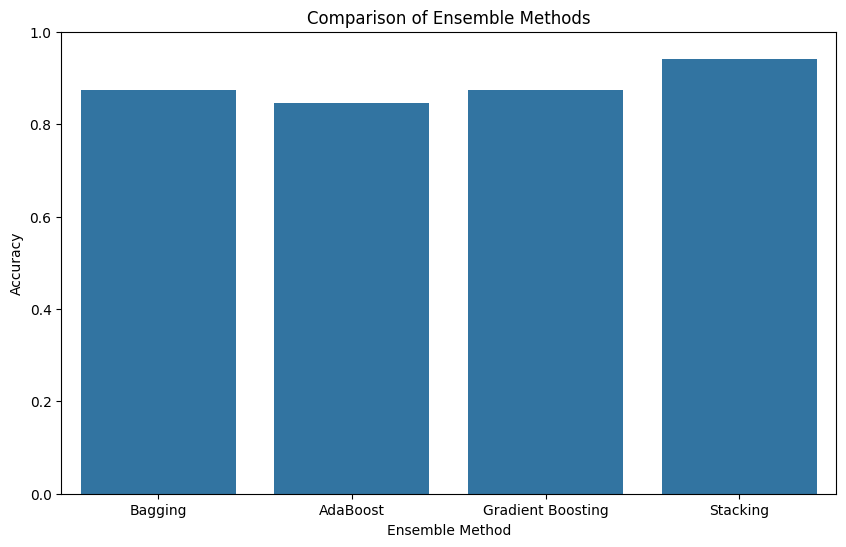

In [24]:
# Create a bar plot for model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Ensemble Methods')
plt.xlabel('Ensemble Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

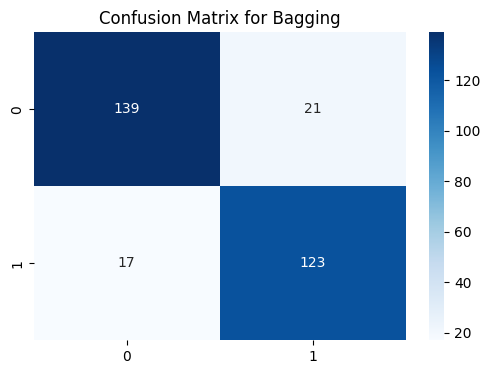

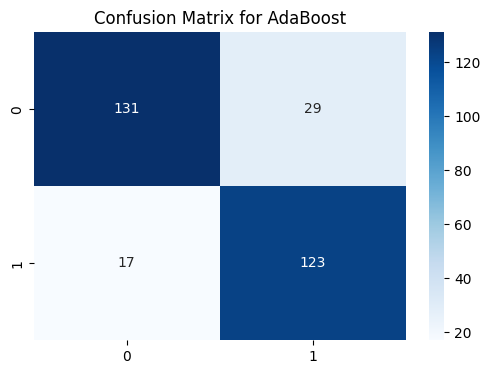

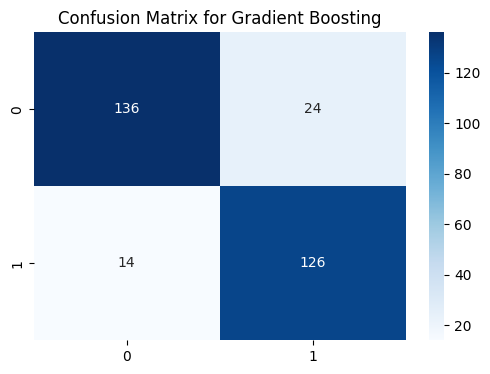

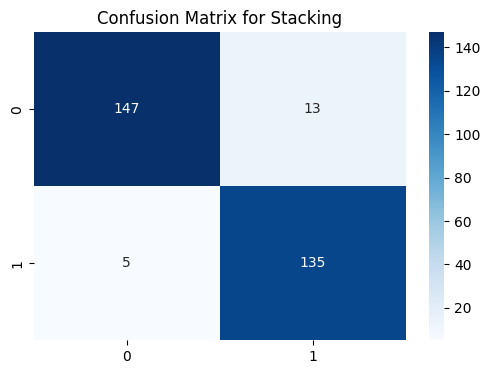

In [26]:
# Confusion Matrix for each model
# Plot confusion matrix for Bagging
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Bagging')
plt.show()

# Plot confusion matrix for AdaBoost
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

# Plot confusion matrix for Stacking
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_stacking), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Stacking')
plt.show()

In [27]:
# Print classification report for each model
print("\nClassification Report for Bagging:\n", classification_report(y_test, y_pred_bagging))
print("\nClassification Report for AdaBoost:\n", classification_report(y_test, y_pred_adaboost))
print("\nClassification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb))
print("\nClassification Report for Stacking:\n", classification_report(y_test, y_pred_stacking))


Classification Report for Bagging:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       160
           1       0.85      0.88      0.87       140

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300


Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       160
           1       0.81      0.88      0.84       140

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       160
           1       0.84      0.90      0.87       140

    accuracy                           0.87       300
   mac